<a href="https://colab.research.google.com/github/saurabhshinkar/Sbsdp/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Importing** **Libraries**

In [143]:
#Import all library that will be used in entire project

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#for date
import datetime

#for linear regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import math

#for decision tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, auc
from sklearn.tree import DecisionTreeRegressor

#for random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, confusion_matrix

#for gradient boosting
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA

# for xg boost
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# **Mount Drive And Import Data**

In [144]:
#Mount google drive for access of the play store dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
# Importing Dataset
File_path='/content/drive/MyDrive/Capstone Projects/Seoul bike sharing demand prediction/'
data= pd.read_csv(File_path + 'SeoulBikeData.csv',encoding= 'unicode_escape')

In [146]:
# First Look 
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [147]:
#tail of data
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [148]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [149]:
#Discription of Data
data.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


# **Handling Missing Vaules**

In [150]:
#checking for null
data.isnull().any()

Date                         False
Rented Bike Count            False
Hour                         False
Temperature(°C)              False
Humidity(%)                  False
Wind speed (m/s)             False
Visibility (10m)             False
Dew point temperature(°C)    False
Solar Radiation (MJ/m2)      False
Rainfall(mm)                 False
Snowfall (cm)                False
Seasons                      False
Holiday                      False
Functioning Day              False
dtype: bool

No null values in our data

# **Making Data In Proper Format**

In [151]:
#type of date
type(data['Date'][0])

str

In [152]:
#converting date type in to Timestamp
data['Date'] = pd.to_datetime(data['Date'])

In [153]:
#creating new columns year,month and day
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month_name()
data['day'] = pd.DatetimeIndex(data['Date']).day_name()

In [154]:
#data head
data.head(1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday


**Correlation Heatmap**

Text(0.5, 1.0, 'Correlation Heatmap')

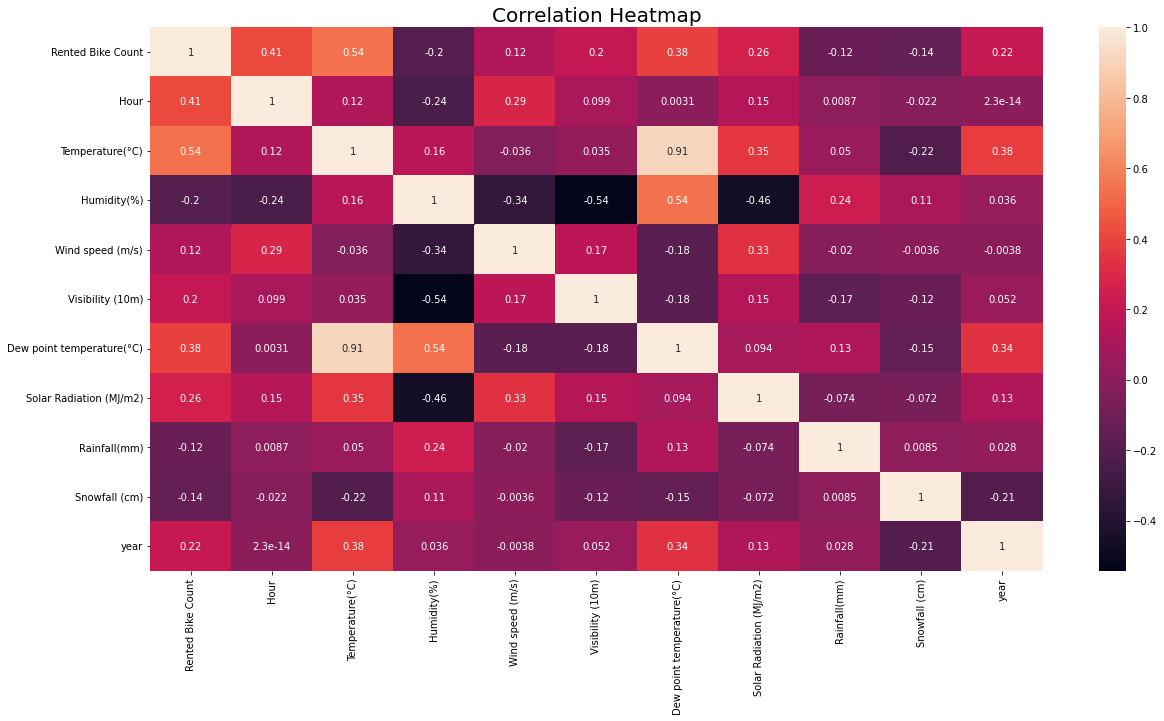

In [155]:
#Correlation Heatmap
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot= True)
plt.title("Correlation Heatmap",fontsize=20)

**Drop column of Dew point temperature(°C) as there is high correlation in Temperature and Dew point temperature(°C)**

In [156]:
# Temperature(°C) and Dew point temperature(°C)
data[["Temperature(°C)","Dew point temperature(°C)"]]

,Temperature(°C),Dew point temperature(°C)
0,-5.2,-17.6
1,-5.5,-17.6
2,-6.0,-17.7
3,-6.2,-17.6
4,-6.0,-18.6
...,...,...
8755,4.2,-10.3
8756,3.4,-9.9
8757,2.6,-9.9
8758,2.1,-9.8


In [157]:
#drop Dew point temperature(°C)
data.drop(columns=['Dew point temperature(°C)'], axis=1,inplace=True)

# **EDA**

In [158]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 5 categorical variables


In [159]:
# find Numerical variables
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 11 numerical variables


In [160]:
#remove date
numerical.remove('Date')

**Boxplot And Distribution Plot Of Numerical Variables**

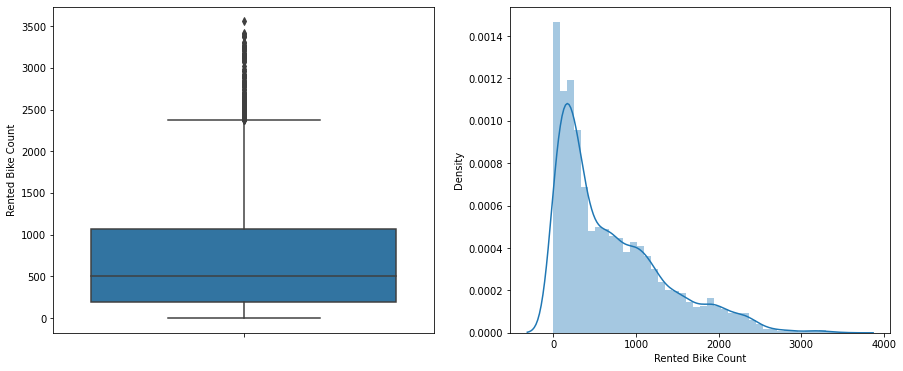

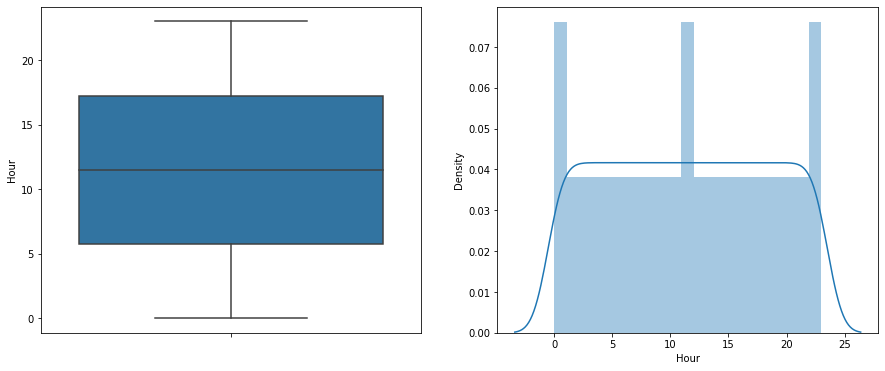

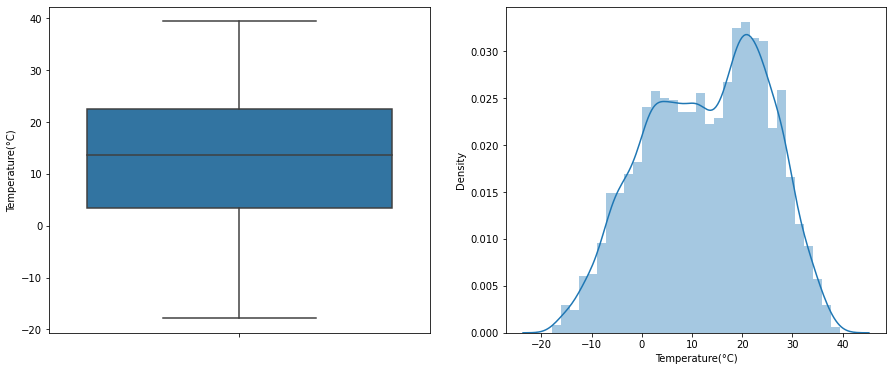

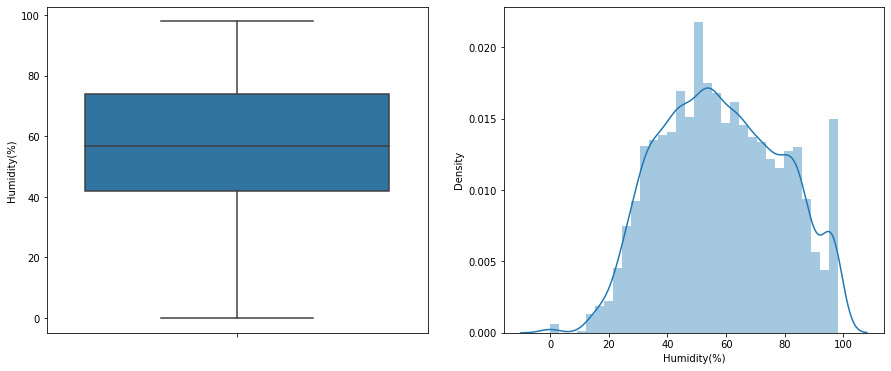

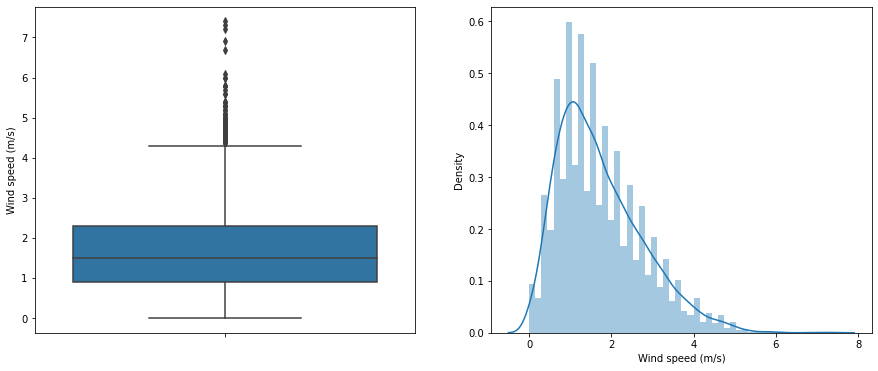

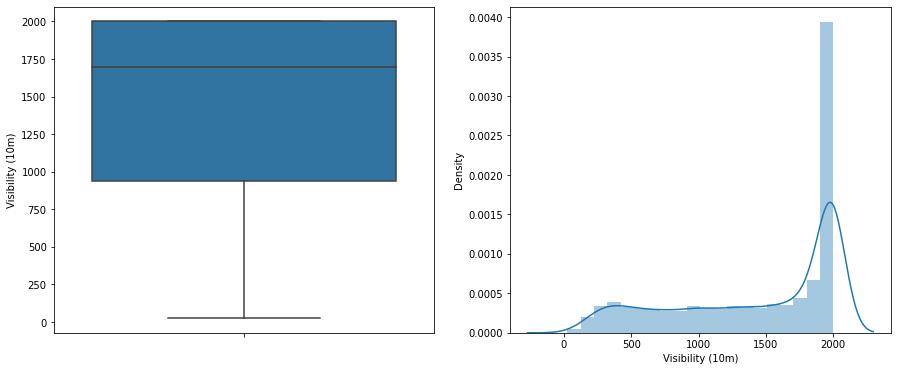

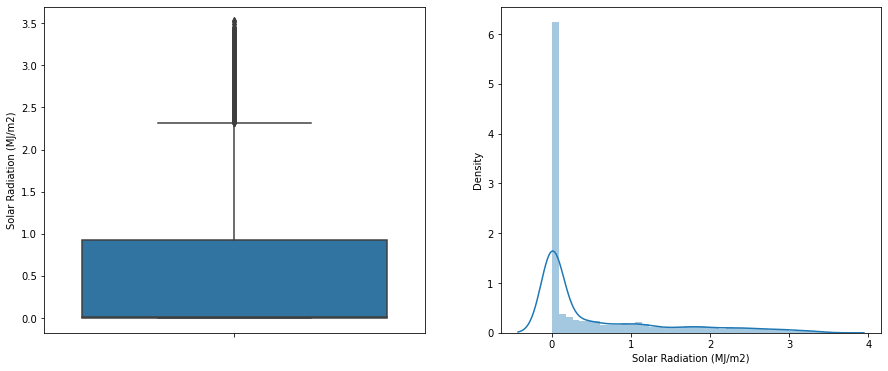

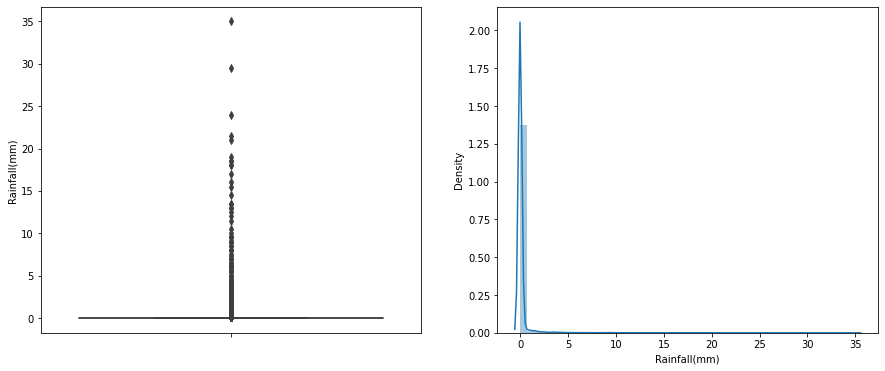

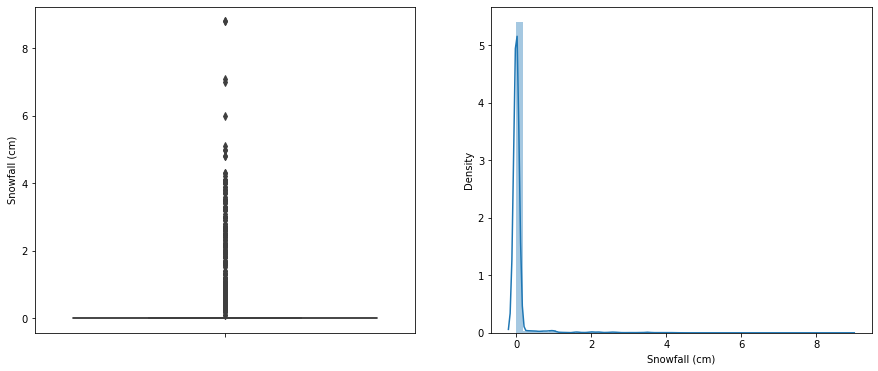

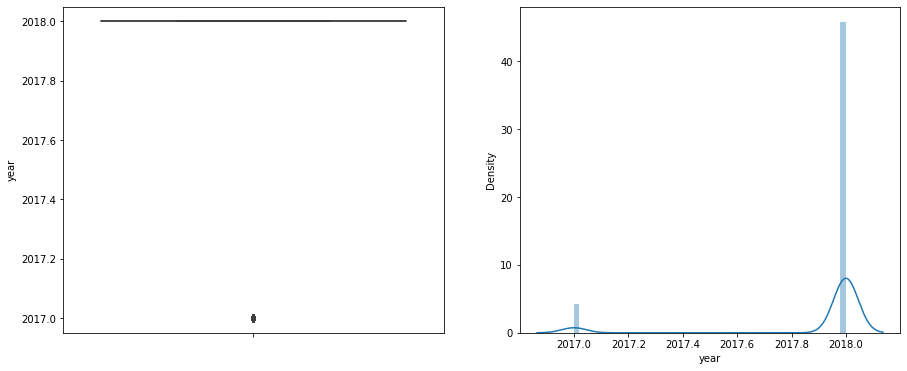

In [161]:
#Boxplot And Distribution Plot Of Numerical Variables
for var in numerical:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var].dropna())
    fig.set_xlabel(var)

    plt.show()

In [162]:
# Number of labels: cardinality
#Let's now check if our categorical variables have a huge number of categories. 
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')

Seasons  contains  4  labels
Holiday  contains  2  labels
Functioning Day  contains  2  labels
month  contains  12  labels
day  contains  7  labels


**Mean Rented Bike Count In Different Hour**

In [163]:
#Mean Rented Bike Count By Hour
rented_bike_count_hour=data.groupby('Hour')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
rented_bike_count_hour

,Hour,Rented Bike Count
18,18,1502.926027
19,19,1195.147945
17,17,1138.509589
20,20,1068.964384
21,21,1031.449315
8,8,1015.701370
16,16,930.621918
22,22,922.797260
15,15,829.186301
14,14,758.824658


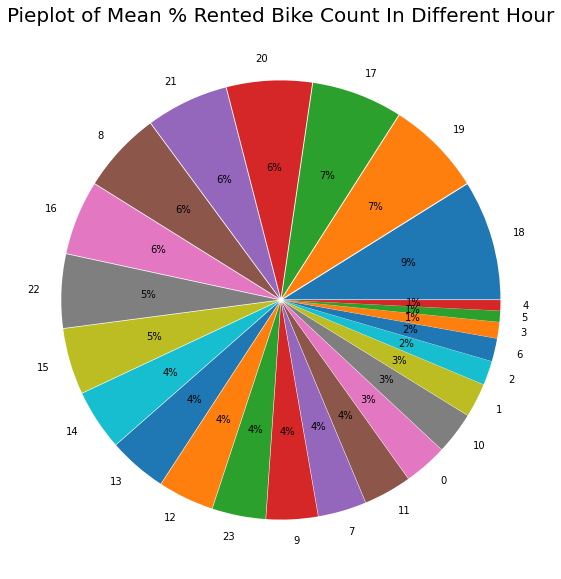

In [164]:
#Pieplot of Mean Rented Bike Count In Different Hour
plt.rcParams['figure.figsize'] = (20,10)
plt.pie(rented_bike_count_hour["Rented Bike Count"],labels=rented_bike_count_hour['Hour'],autopct='%.0f%%',explode=[0.01]*24)
plt.title('Pieplot of Mean % Rented Bike Count In Different Hour',fontsize=20)
plt.show()

In [165]:
#sns.histplot(x='Hour', y="Rented Bike Count", data=rented_bike_count_hour)

**Mean Rented Bike Count In Different Temperature**

In [166]:
#Mean Rented Bike Count In Different Temperature
temp_and_rented_bike= data.groupby('Temperature(°C)')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
temp_and_rented_bike

,Temperature(°C),Rented Bike Count
485,32.2,1692.875000
488,32.5,1638.000000
466,30.3,1579.750000
515,35.2,1558.333333
429,26.6,1552.650000
...,...,...
14,-15.3,63.833333
12,-15.6,60.333333
8,-16.0,46.000000
3,-16.9,36.000000


Text(0.5, 1.0, 'Regression Plot of Mean Rented Bike Count In Different Temperature')

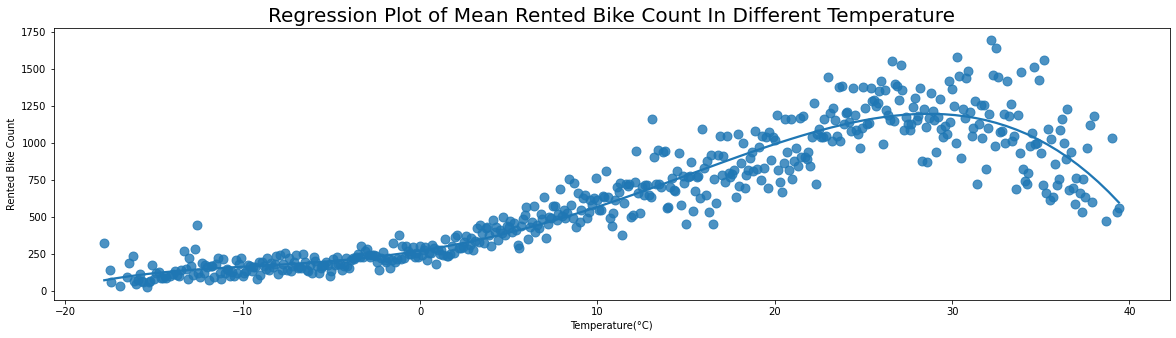

In [167]:
# regression plot of Mean Rented Bike Count In Different Temperature
plt.figure(figsize = (20,5))
sns.regplot(x="Temperature(°C)", y="Rented Bike Count", data=temp_and_rented_bike,
                 scatter_kws={"s": 80},
                 order=4, ci=None)
plt.title("Regression Plot of Mean Rented Bike Count In Different Temperature",fontsize=20)

In [168]:
#plt.figure(figsize = (50,50))
#temp_and_rented_bike.plot(x="Temperature(°C)",y="Rented Bike Count")

**Mean Rented Bike Count In Different Humidity**

In [169]:
#Mean Rented Bike Count In Different Humidity
humidity_and_rented_bike= data.groupby('Humidity(%)')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
humidity_and_rented_bike

,Humidity(%),Rented Bike Count
3,12,2032.000000
2,11,1986.000000
4,13,1451.000000
1,10,1315.000000
39,48,965.284553
...,...,...
83,92,177.851852
89,98,172.320000
87,96,170.828829
88,97,166.069364


Text(0.5, 0, 'Humidity(%)')

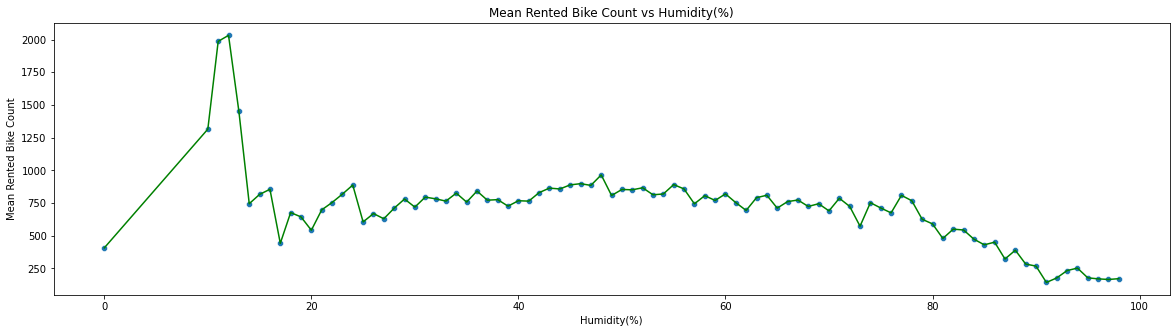

In [170]:
#Scatterplot and lineplot of Mean Rented Bike Count In Different Humidity
plt.figure(figsize = (20,5))
sns.scatterplot(x="Humidity(%)", y="Rented Bike Count", data=humidity_and_rented_bike)
sns.lineplot(x="Humidity(%)", y="Rented Bike Count", data=humidity_and_rented_bike, color='g')
plt.title('Mean Rented Bike Count vs Humidity(%)')
plt.ylabel('Mean Rented Bike Count')
plt.xlabel('Humidity(%)')

**Mean Rented Bike Count In Different Rainfall**

In [171]:
#Mean Rented Bike Count In Different Rainfall
rainfall_and_rented_bike= data.groupby('Rainfall(mm)')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
rainfall_and_rented_bike

,Rainfall(mm),Rented Bike Count
12,1.3,764.000000
0,0.0,739.311103
57,21.5,596.000000
8,0.9,489.333333
35,7.3,468.000000
...,...,...
45,12.0,13.000000
51,16.0,11.000000
53,18.0,10.500000
50,15.5,10.000000


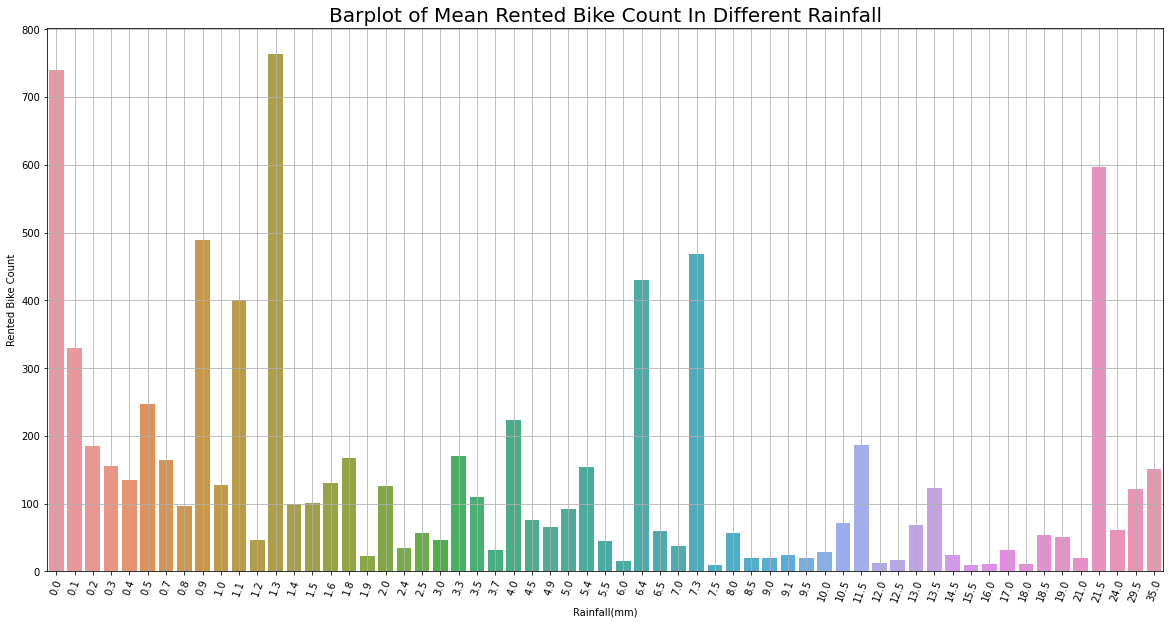

In [172]:
# Barplot of mean ranted bike coungt by rainfall
plt.figure(figsize = (20,10))
sns.barplot(x="Rainfall(mm)", y="Rented Bike Count", data=rainfall_and_rented_bike)
plt.title("Barplot of Mean Rented Bike Count In Different Rainfall",fontsize=20)
plt.xticks(rotation=70, horizontalalignment="center")
plt.grid()

**Mean Rented Bike Count In Different Seasons**

In [173]:
#Mean Rented Bike Count In Different Seasons
seasons_and_rented_bike= data.groupby('Seasons')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
seasons_and_rented_bike

,Seasons,Rented Bike Count
2,Summer,1034.073370
0,Autumn,819.597985
1,Spring,730.031250
3,Winter,225.541204


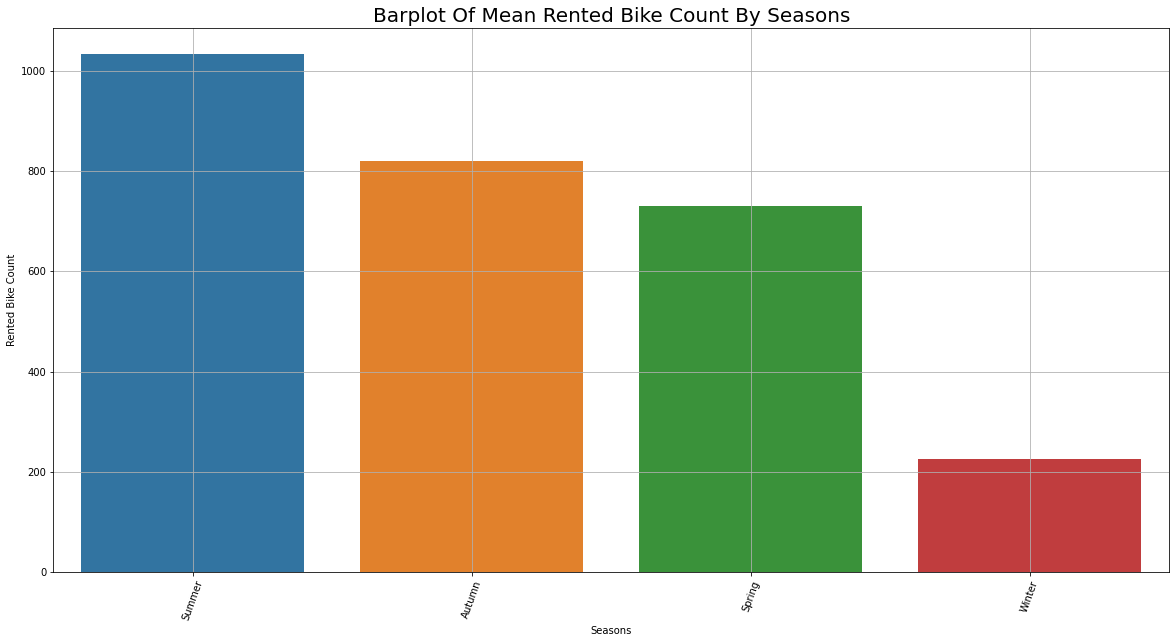

In [174]:
#Barplot of mean ranted bike count In Different Seasons
plt.figure(figsize = (20,10))
sns.barplot(x="Seasons", y="Rented Bike Count", data=seasons_and_rented_bike)
plt.title("Barplot Of Mean Rented Bike Count By Seasons",fontsize=20)
plt.xticks(rotation=70, horizontalalignment="center")
plt.grid()

**Mean Rented Bike Count In Holidays,Functioning day And In Different Year,Months And Days**

In [175]:
#Mean Rented Bike Count In Holidays
holiday_and_rented_bike= data.groupby('Holiday')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
holiday_and_rented_bike

,Holiday,Rented Bike Count
1,No Holiday,715.228026
0,Holiday,499.756944


In [176]:
#Mean Rented Bike Count In Functioning day
Functioning_Day_and_rented_bike= data.groupby('Functioning Day')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
Functioning_Day_and_rented_bike

,Functioning Day,Rented Bike Count
1,Yes,729.156999
0,No,0.000000


In [177]:
#Mean Rented Bike Count In Different Year
year_and_rented_bike= data.groupby('year')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
year_and_rented_bike

,year,Rented Bike Count
1,2018,746.879242
0,2017,249.099462


In [178]:
#Mean Rented Bike Count In Different Month
month_and_rented_bike= data.groupby('month')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
month_and_rented_bike

,month,Rented Bike Count
6,June,981.566667
5,July,929.219086
8,May,895.091398
10,October,842.725806
1,August,825.524194
0,April,772.526389
11,September,693.508333
9,November,685.294444
7,March,611.608871
2,December,419.047043


In [179]:
#Mean Rented Bike Count In Different Day
day_and_rented_bike= data.groupby('day')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
day_and_rented_bike

,day,Rented Bike Count
4,Thursday,743.803686
0,Friday,734.449346
2,Saturday,730.348558
1,Monday,719.635833
6,Wednesday,714.521226
5,Tuesday,678.362421
3,Sunday,615.968364


<Figure size 1080x432 with 0 Axes>

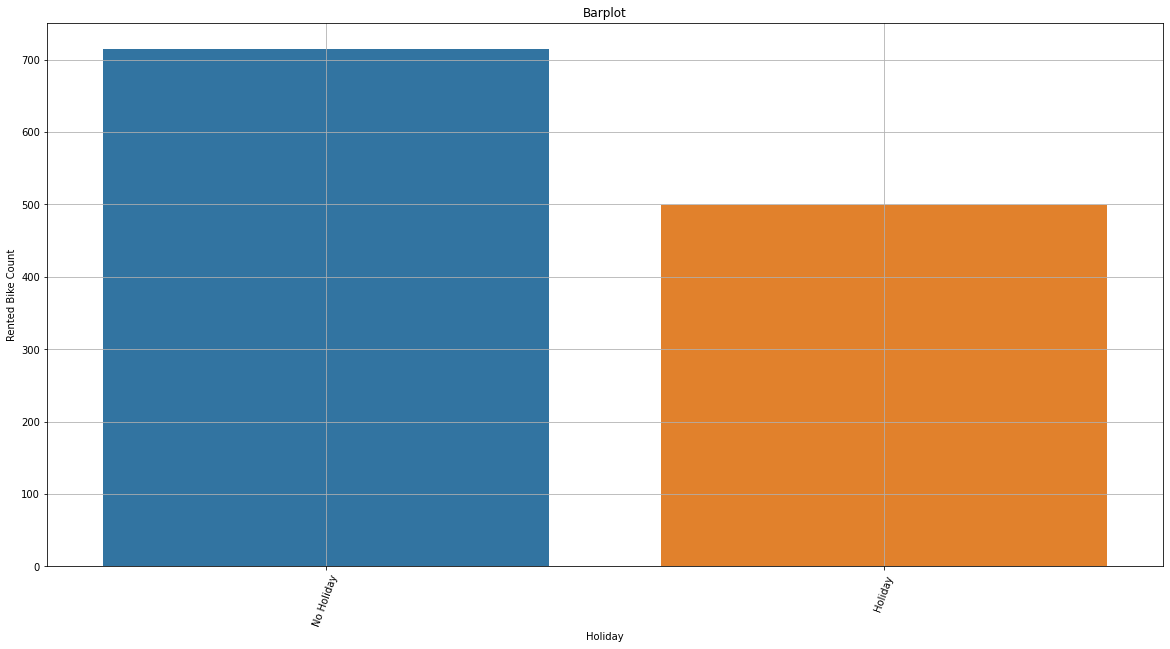

<Figure size 1080x432 with 0 Axes>

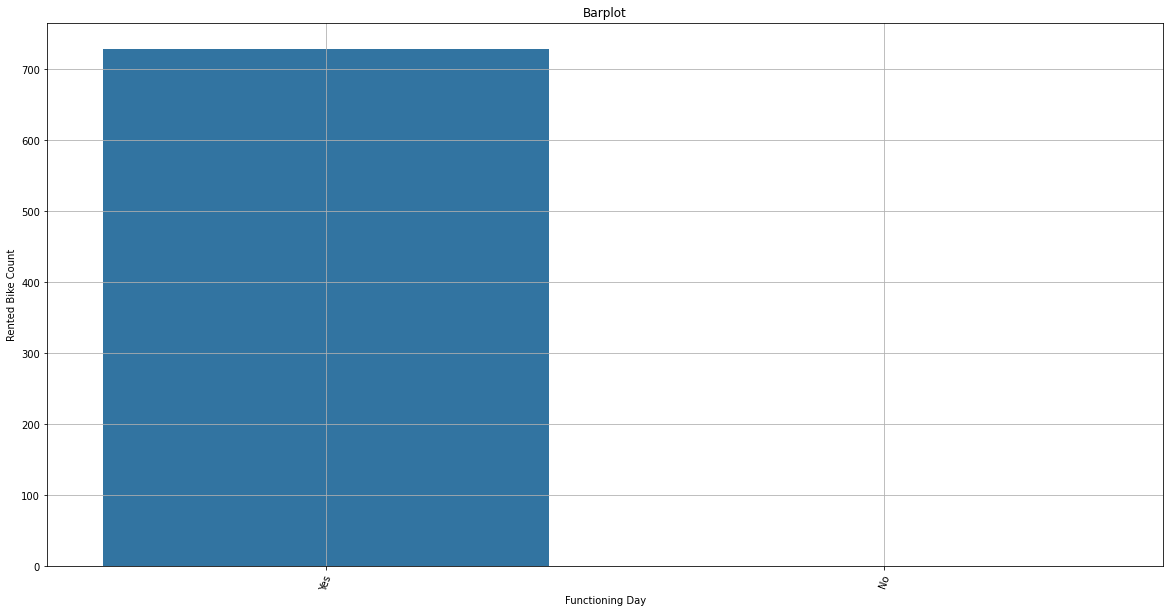

<Figure size 1080x432 with 0 Axes>

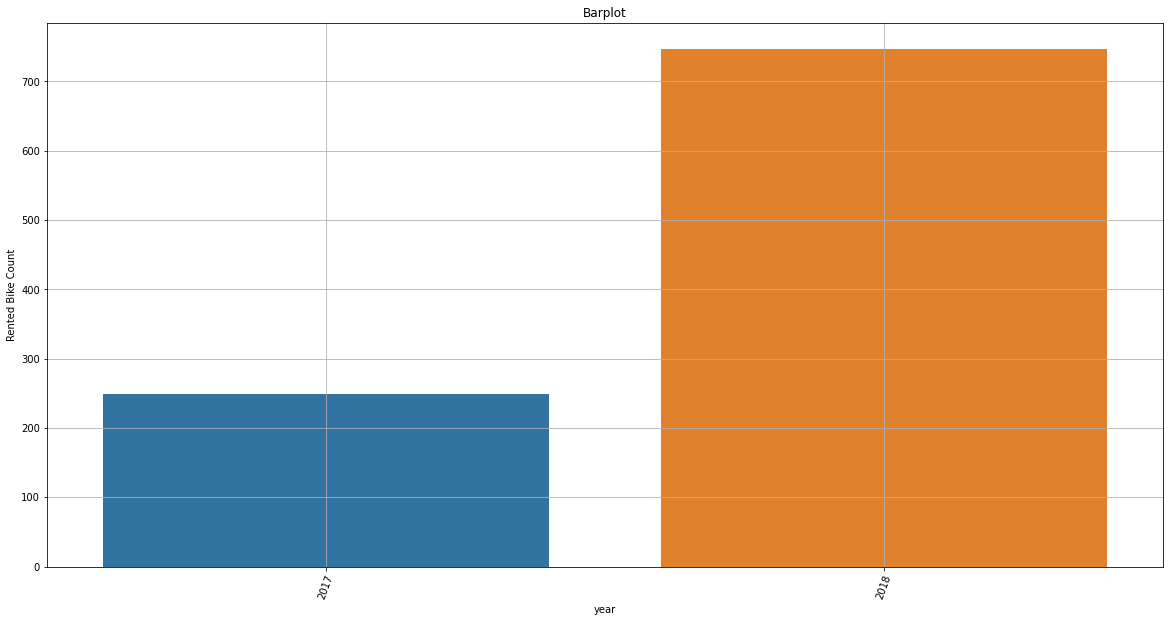

<Figure size 1080x432 with 0 Axes>

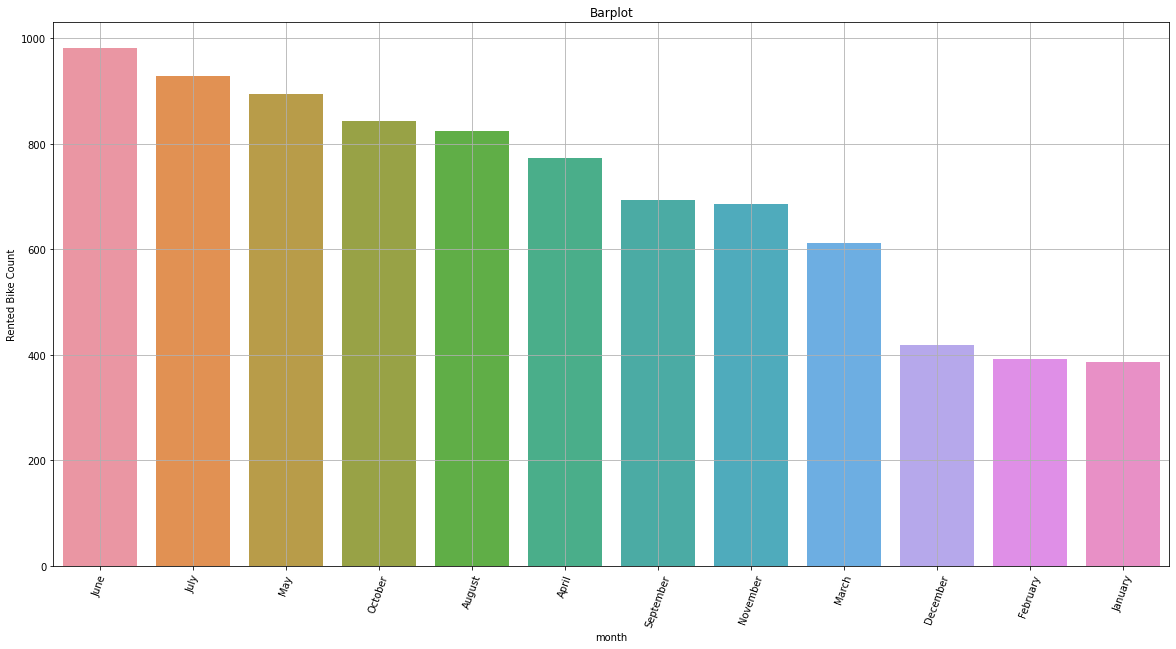

<Figure size 1080x432 with 0 Axes>

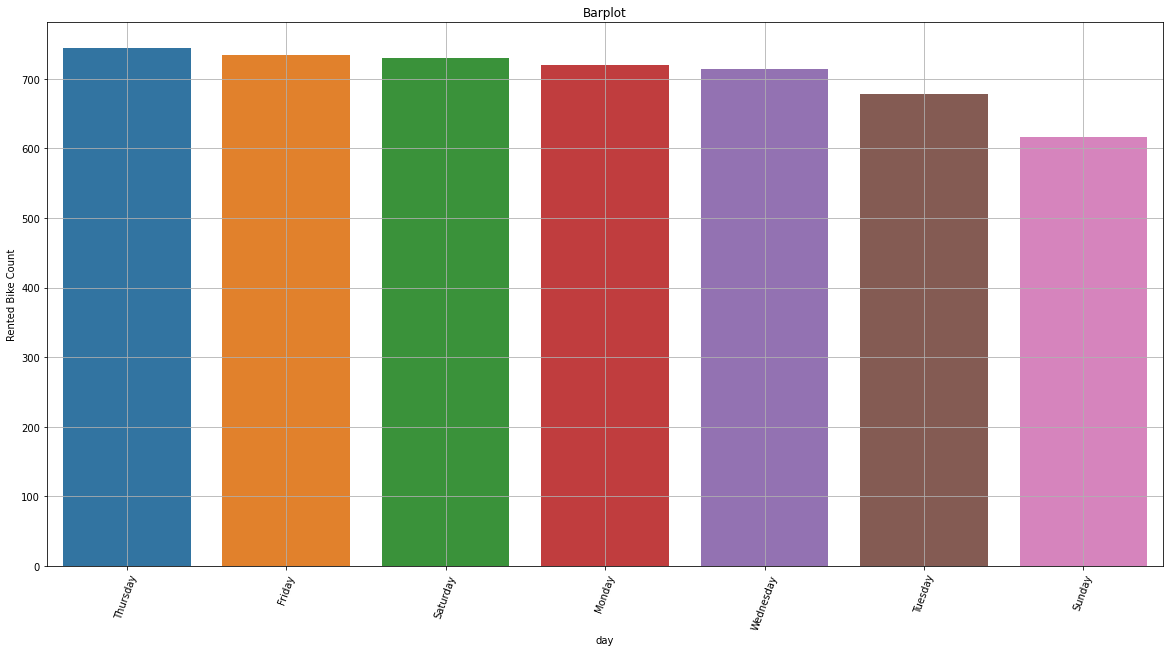

In [180]:
#Barplots of holiday_and_rented_bike,Functioning_Day_and_rented_bike,year_and_rented_bike,month_and_rented_bike,day_and_rented_bike
var=[holiday_and_rented_bike,Functioning_Day_and_rented_bike,year_and_rented_bike,month_and_rented_bike,day_and_rented_bike]
for i in var:
    plt.figure(figsize=(15,6))
    plt.subplots(1,1)
    fig = sns.barplot(x=i.columns[0], y=i.columns[1], data=i)
    plt.xticks(rotation=70, horizontalalignment="center")
    fig.set_title('Barplot')
    plt.grid()

    plt.show()

# **Final Data**

In [181]:
# Encode Categorical Variables - one hot encoding
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(data[['Seasons','Holiday','Functioning Day','year','month','day']]).toarray())

encoder_df.columns = encoder.get_feature_names(['Seasons','Holiday','Functioning Day','year','month','day'])

#merge one-hot encoded columns back with original DataFrame
final_df = data.join(encoder_df)


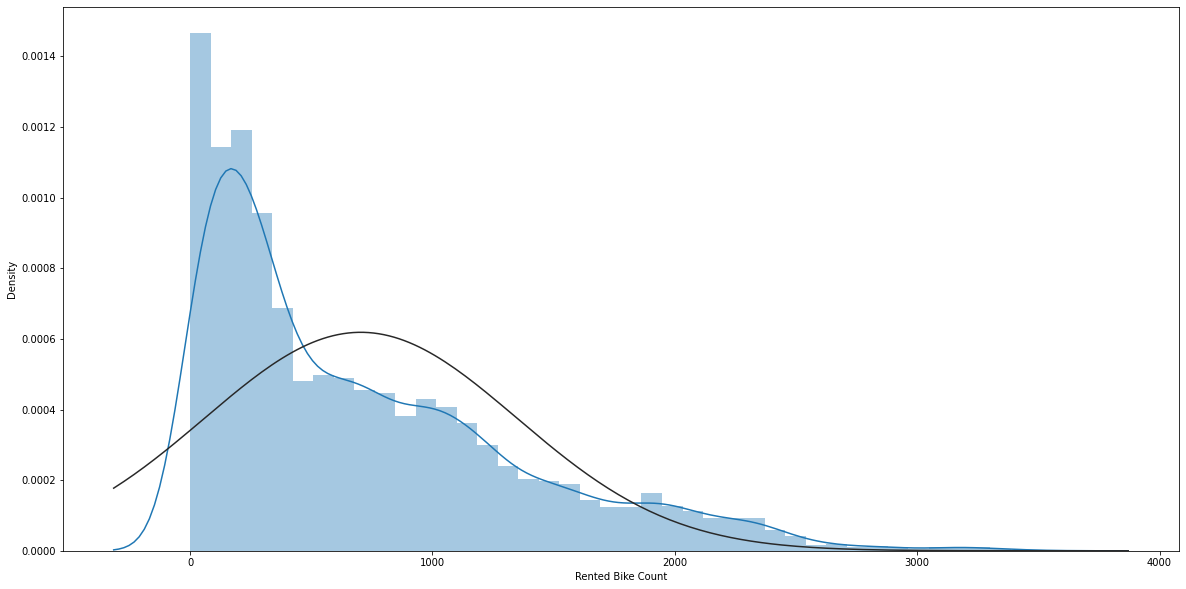

<Figure size 1440x720 with 0 Axes>

In [182]:
# Target Variable Transformation
sns.distplot(final_df['Rented Bike Count'], fit=norm);
fig = plt.figure()

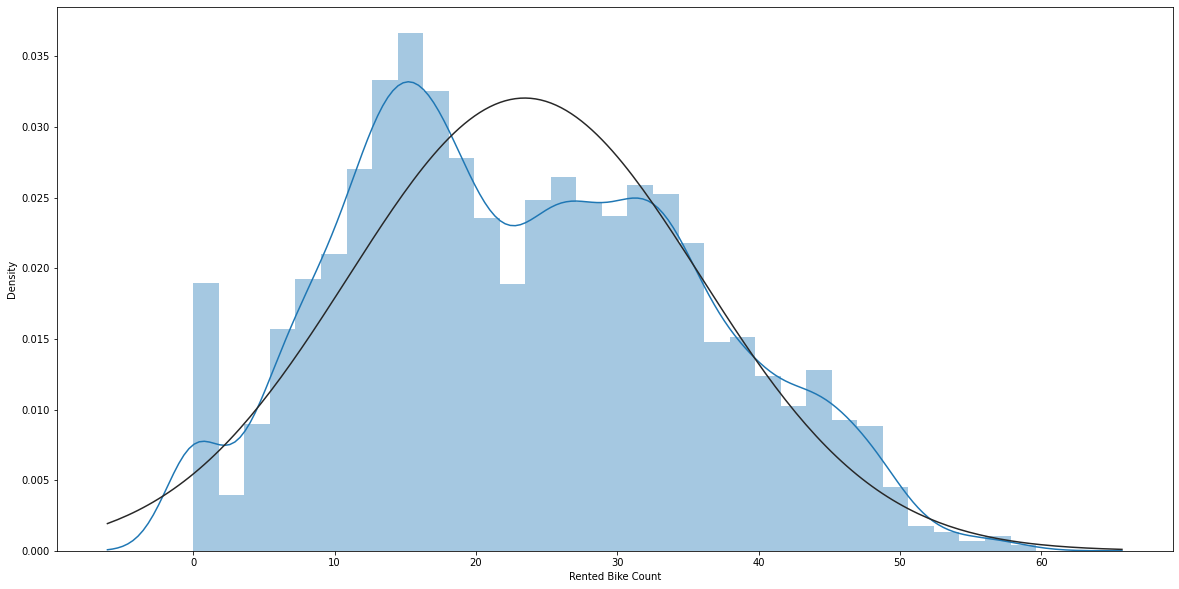

<Figure size 1440x720 with 0 Axes>

In [183]:
# It looks more normal now.
sns.distplot(np.sqrt(final_df['Rented Bike Count']), fit=norm);
fig = plt.figure()

In [184]:
#Dependant variable
Y =np.sqrt(final_df['Rented Bike Count'])

In [185]:
#Independant variable
final_df.drop(columns=['Rented Bike Count','Date','year','month','day'], axis=1,inplace=True)
final_df.drop(columns=['Seasons','Holiday','Functioning Day'], axis=1,inplace=True)
X=final_df

# **Linear Regression**

In [186]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [187]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [188]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [189]:
#regressor intercept,coefficients
print("Intercept:", regressor.intercept_)
print("Coefficients:",regressor.coef_)


Intercept: -102520444180419.03
Coefficients: [ 1.10346279e+01  2.97723946e+01 -1.48386086e+01  7.09373545e-01
  1.67971463e+00 -3.11574641e+00 -5.38233806e+01 -3.53716418e-02
  3.36893748e+14  3.36893748e+14  3.36893748e+14  3.36893748e+14
  2.09338342e+14  2.09338342e+14  5.69583580e+13  5.69583580e+13
 -2.05934417e+14 -2.05934417e+14 -5.15073021e+13 -5.15073021e+13
 -5.15073021e+13 -5.15073021e+13 -5.15073021e+13 -5.15073021e+13
 -5.15073021e+13 -5.15073021e+13 -5.15073021e+13 -5.15073021e+13
 -5.15073021e+13 -5.15073021e+13 -2.43228286e+14 -2.43228286e+14
 -2.43228286e+14 -2.43228286e+14 -2.43228286e+14 -2.43228286e+14
 -2.43228286e+14]


In [190]:
# Predicting the results
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [191]:
#Evaluation for train set
mean_squared_error_linear_train=mean_squared_error(y_train, y_pred_train)
r2_score_linear_train= r2_score(y_train, y_pred_train)
adjusted_r2_score_linear_train=1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("mean_squared_error_linear_train:",mean_squared_error_linear_train)
print("r2_score_linear_train:",r2_score_linear_train)
print("adjusted_r2_score_linear_train:",adjusted_r2_score_linear_train)

mean_squared_error_linear_train: 51.63196704135537
r2_score_linear_train: 0.6654511607517628
adjusted_r2_score_linear_train: 0.6636752199982212


In [192]:
#Evaluation for test set
mean_squared_error_linear_test=mean_squared_error(y_test, y_pred_test)
r2_score_linear_test= r2_score(y_test, y_pred_test)
adjusted_r2_score_linear_test=1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("mean_squared_error_linear_test:",mean_squared_error_linear_test)
print("r2_score_linear_test:",r2_score_linear_test)
print("adjusted_r2_score_linear_test:",adjusted_r2_score_linear_test)

mean_squared_error_linear_test: 53.377437083669705
r2_score_linear_test: 0.6610660635389255
adjusted_r2_score_linear_test: 0.6537495199863819


# **Decision Tree**

In [193]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=324)

In [194]:
TreeRegressor= DecisionTreeRegressor(criterion='mse', random_state=0)
TreeRegressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', random_state=0)

In [195]:
# Predicting the results
y_pred_train = TreeRegressor.predict(X_train)
y_pred_test =TreeRegressor.predict(X_test)

In [196]:
#Evaluation for train set
mean_squared_error_decision_tree_train=mean_squared_error(y_train, y_pred_train)
r2_score_decision_tree_train= r2_score(y_train, y_pred_train)
adjusted_r2_score_decision_tree_train=1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("mean_squared_error_decision_tree_train:",mean_squared_error_decision_tree_train)
print("r2_score_decision_tree_train:",r2_score_decision_tree_train)
print("adjusted_r2_score_decision_tree_train:",adjusted_r2_score_decision_tree_train)

mean_squared_error_decision_tree_train: 0.0
r2_score_decision_tree_train: 1.0
adjusted_r2_score_decision_tree_train: 1.0


In [197]:
#Evaluation for test set
mean_squared_error_decision_tree_test=mean_squared_error(y_test, y_pred_test)
r2_score_decision_tree_test= r2_score(y_test, y_pred_test)
adjusted_r2_score_decision_tree_test=1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("mean_squared_error_decision_tree_test:",mean_squared_error_decision_tree_test)
print("r2_score_decision_tree_test:",r2_score_decision_tree_test)
print("adjusted_r2_score_decision_tree_test:",adjusted_r2_score_decision_tree_test)

mean_squared_error_decision_tree_test: 26.043439393364014
r2_score_decision_tree_test: 0.8301089682610303
adjusted_r2_score_decision_tree_test: 0.8279056846387584


In [198]:
#storing features and there importance
features = X_train.columns
importances = TreeRegressor.feature_importances_
indices = np.argsort(importances)

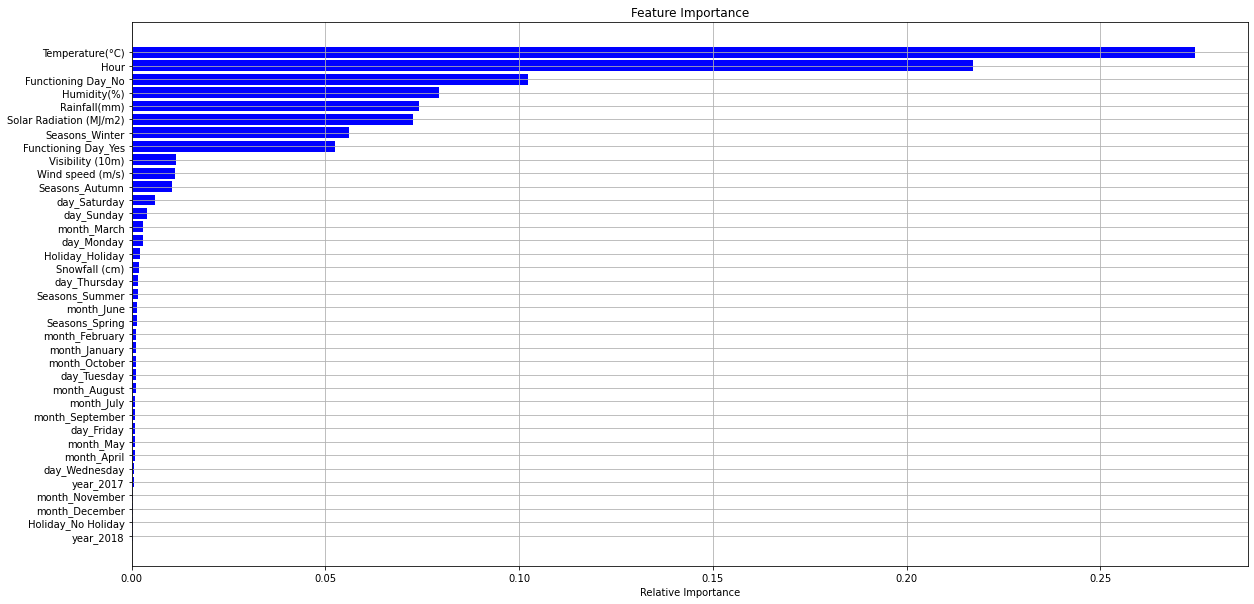

In [199]:
#barh plot of features and there importance
plt.figure(figsize=(20,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

**Decision Tree Using Grid Search CV**

In [200]:
#Grid search CV
grid_values = {'max_depth':[3, 5, 7]}
TreeRegressorr= GridSearchCV(TreeRegressor, param_grid = grid_values, cv=5)

# Fit the object to train dataset
TreeRegressorr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(criterion='mse', random_state=0),
             param_grid={'max_depth': [3, 5, 7]})

In [201]:
#best found parameters
TreeRegressorr.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__ccp_alpha', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__random_state', 'estimator__splitter', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [202]:
# Predicting the results
y_pred_train = TreeRegressorr.predict(X_train)
y_pred_test =TreeRegressorr.predict(X_test)

In [203]:
#Evaluation for train set
mean_squared_error_decision_tree_gridcv_train=mean_squared_error(y_train, y_pred_train)
r2_score_decision_tree_gridcv_train= r2_score(y_train, y_pred_train)
adjusted_r2_score_decision_tree_gridcv_train=1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("mean_squared_error_decision_tree_gridcv_train:",mean_squared_error_decision_tree_gridcv_train)
print("r2_score_decision_tree_gridcv_train:",r2_score_decision_tree_gridcv_train)
print("adjusted_r2_score_decision_tree_gridcv_train:",adjusted_r2_score_decision_tree_gridcv_train)

mean_squared_error_decision_tree_gridcv_train: 23.018425351508764
r2_score_decision_tree_gridcv_train: 0.8523024376521783
adjusted_r2_score_decision_tree_gridcv_train: 0.8513652382340906


In [204]:
#Evaluation for test set
mean_squared_error_decision_tree_gridcv_test=mean_squared_error(y_test, y_pred_test)
r2_score_decision_tree_gridcv_test= r2_score(y_test, y_pred_test)
adjusted_r2_score_decision_tree_gridcv_test=1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("mean_squared_error_decision_tree_gridcv_test:",mean_squared_error_decision_tree_gridcv_test)
print("r2_score_decision_tree_gridcv_test:",r2_score_decision_tree_gridcv_test)
print("adjusted_r2_score_decision_tree_gridcv_test:",adjusted_r2_score_decision_tree_gridcv_test)

mean_squared_error_decision_tree_gridcv_test: 30.21753469317526
r2_score_decision_tree_gridcv_test: 0.8028797937134317
adjusted_r2_score_decision_tree_gridcv_test: 0.8003233802424877


# **Random Forest**

In [205]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


RF_Regressor = RandomForestRegressor() 

# Fit the object to train dataset
RF_Regressor.fit(X_train, y_train)

RandomForestRegressor()

In [206]:
# Predicting the results
y_pred_train = RF_Regressor.predict(X_train)
y_pred_test =RF_Regressor.predict(X_test)

In [207]:
#Evaluation for train set
mean_squared_error_RF_Regressor_train=mean_squared_error(y_train, y_pred_train)
r2_score_RF_Regressor_train= r2_score(y_train, y_pred_train)
adjusted_r2_score_RF_Regressor_train=1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("mean_squared_error_RF_Regressor_train:",mean_squared_error_RF_Regressor_train)
print("r2_score_RF_Regressor_train:",r2_score_RF_Regressor_train)
print("adjusted_r2_score_RF_Regressor_train:",adjusted_r2_score_RF_Regressor_train)

mean_squared_error_RF_Regressor_train: 1.700077602925236
r2_score_RF_Regressor_train: 0.9889843633453862
adjusted_r2_score_RF_Regressor_train: 0.988925887225412


In [208]:
#Evaluation for test set
mean_squared_error_RF_Regressor_test=mean_squared_error(y_test, y_pred_test)
r2_score_RF_Regressor_test= r2_score(y_test, y_pred_test)
adjusted_r2_score_RF_Regressor_test=1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("mean_squared_error_RF_Regressor_test:",mean_squared_error_RF_Regressor_test)
print("r2_score_RF_Regressor_test:",r2_score_RF_Regressor_test)
print("adjusted_r2_score_RF_Regressor_test:",adjusted_r2_score_RF_Regressor_test)

mean_squared_error_RF_Regressor_test: 12.820381937696343
r2_score_RF_Regressor_test: 0.9185936464078139
adjusted_r2_score_RF_Regressor_test: 0.9168363330572241


In [209]:
#storing features and there importance
features = X_train.columns
importances = RF_Regressor.feature_importances_
indices = np.argsort(importances)

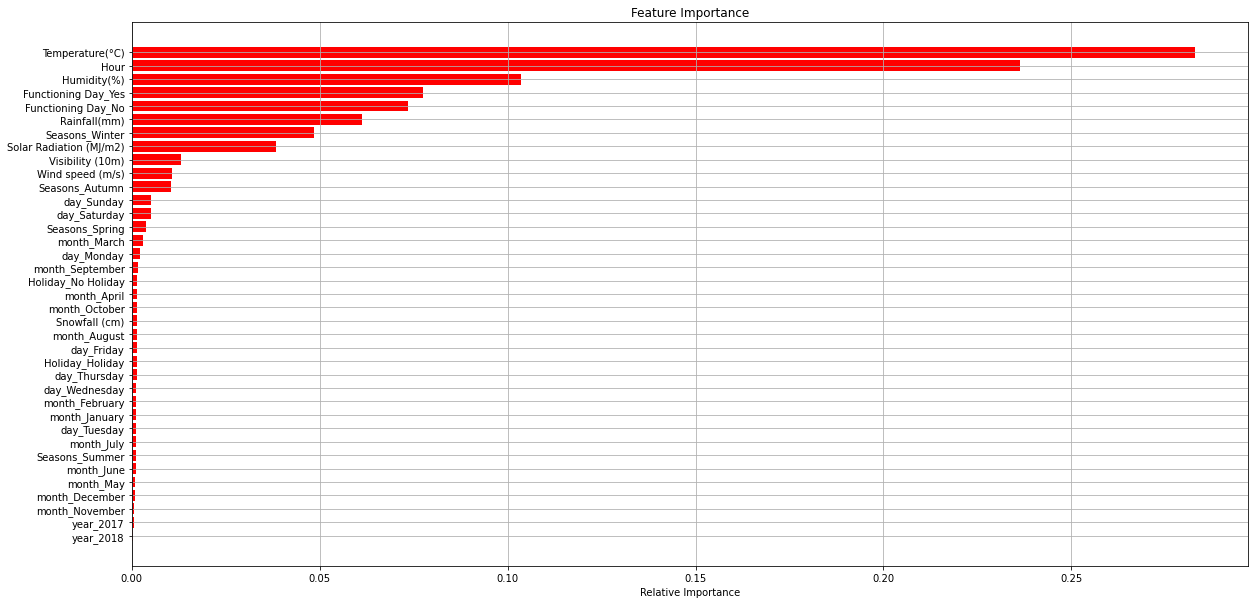

In [210]:
#barh plot of features and there importance
plt.figure(figsize=(20,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

**Random Forest Using Grid Search CV**

In [211]:
#Grid search CV
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
RF_Regressorr= GridSearchCV(RF_Regressor, param_grid = grid_values, cv=5)

# Fit the object to train dataset
RF_Regressorr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]})

In [212]:
# Predicting the results
y_pred_train = RF_Regressorr.predict(X_train)
y_pred_test =RF_Regressorr.predict(X_test)

In [213]:
#Evaluation for train set
mean_squared_error_RF_Regressor_gridcv_train=mean_squared_error(y_train, y_pred_train)
r2_score_RF_Regressor_gridcv_train= r2_score(y_train, y_pred_train)
adjusted_r2_score_RF_Regressor_gridcv_train=1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("mean_squared_error_RF_Regressor_gridcv_train:",mean_squared_error_RF_Regressor_gridcv_train)
print("r2_score_RF_Regressor_gridcv_train:",r2_score_RF_Regressor_gridcv_train)
print("adjusted_r2_score_RF_Regressor_gridcv_train:",adjusted_r2_score_RF_Regressor_gridcv_train)

mean_squared_error_RF_Regressor_gridcv_train: 19.691287982586328
r2_score_RF_Regressor_gridcv_train: 0.8724104868481863
adjusted_r2_score_RF_Regressor_gridcv_train: 0.8717331824024737


In [214]:
#Evaluation for test set
mean_squared_error_RF_Regressor_gridcv_test=mean_squared_error(y_test, y_pred_test)
r2_score_RF_Regressor_gridcv_test= r2_score(y_test, y_pred_test)
adjusted_r2_score_RF_Regressor_gridcv_test=1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("mean_squared_error_RF_Regressor_gridcv_test:",mean_squared_error_RF_Regressor_gridcv_test)
print("r2_score_RF_Regressor_gridcv_test:",r2_score_RF_Regressor_gridcv_test)
print("adjusted_r2_score_RF_Regressor_gridcv_test:",adjusted_r2_score_RF_Regressor_gridcv_test)

mean_squared_error_RF_Regressor_gridcv_test: 23.644005924874193
r2_score_RF_Regressor_gridcv_test: 0.8498662273862094
adjusted_r2_score_RF_Regressor_gridcv_test: 0.8466252999727262


# **Gradient Boosting**

In [215]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Standardize the dataset
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Hyperparameters for GradientBoostingRegressor

gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

# Create an instance of gradient boosting regressor

gbr = GradientBoostingRegressor(**gbr_params)

# Fit the model

gbr.fit(X_train_std, y_train)


GradientBoostingRegressor(learning_rate=0.01, loss='ls', min_samples_split=5,
                          n_estimators=1000)

In [216]:
# Predicting the results
y_pred_train = gbr.predict(X_train_std)
y_pred_test =gbr.predict(X_test_std)

In [217]:
#Evaluation for train set
mean_squared_error_gbr_train=mean_squared_error(y_train, y_pred_train)
r2_score_gbr_train= r2_score(y_train, y_pred_train)
adjusted_r2_score_gbr_train=1-(1-r2_score((y_train), (y_pred_train)))*((X_train_std.shape[0]-1)/(X_train_std.shape[0]-X_train_std.shape[1]-1))
print("mean_squared_error_gbr_train:",mean_squared_error_gbr_train)
print("r2_score_gbr_train:",r2_score_gbr_train)
print("adjusted_r2_score_gbr_train:",adjusted_r2_score_gbr_train)

mean_squared_error_gbr_train: 16.739419880010008
r2_score_gbr_train: 0.8915370881364894
adjusted_r2_score_gbr_train: 0.8909613165814033


In [218]:
#Evaluation for test set
mean_squared_error_gbr_test=mean_squared_error(y_test, y_pred_test)
r2_score_gbr_test= r2_score(y_test, y_pred_test)
adjusted_r2_score_gbr_test=1-(1-r2_score((y_test), (y_pred_test)))*((X_test_std.shape[0]-1)/(X_test_std.shape[0]-X_test_std.shape[1]-1))
print("mean_squared_error_gbr_test:",mean_squared_error_gbr_test)
print("r2_score_gbr_test:",r2_score_gbr_test)
print("adjusted_r2_score_gbr_test:",adjusted_r2_score_gbr_test)

mean_squared_error_gbr_test: 19.364162799329034
r2_score_gbr_test: 0.8770422058001427
adjusted_r2_score_gbr_test: 0.874387924361756


In [219]:
#storing features and there importance
features = X_train.columns
importances = gbr.feature_importances_
indices = np.argsort(importances)

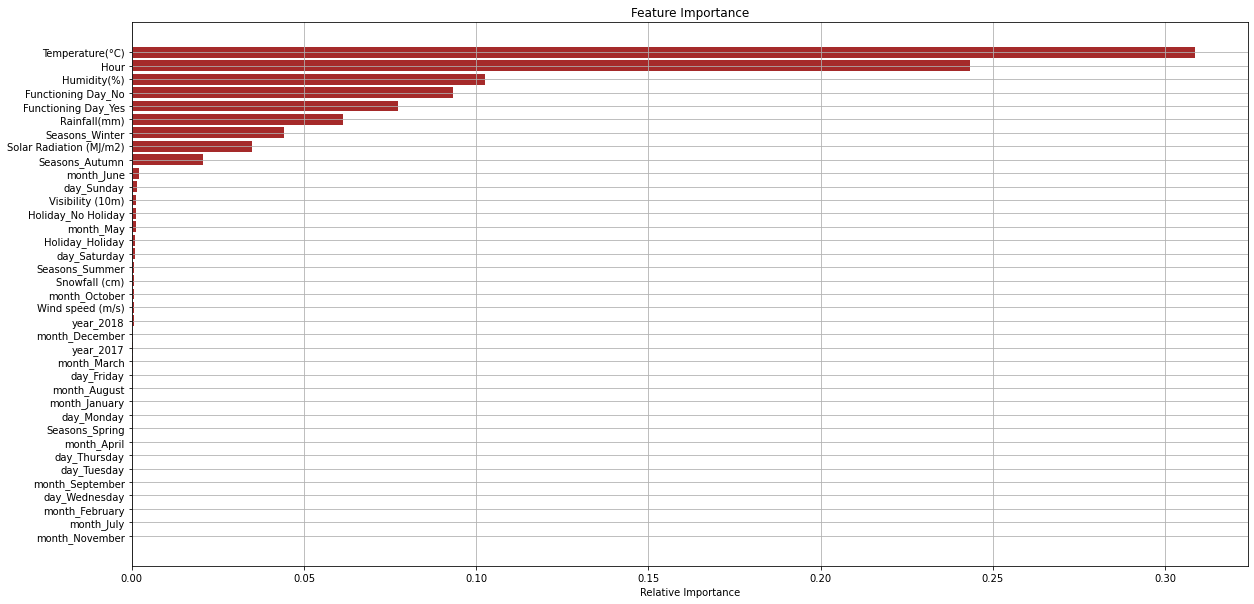

In [220]:
#barh plot of features and there importance
plt.figure(figsize=(20,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='brown', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

**Gradient Boosting using Grid Search CV**

In [221]:
#Grid Search CV
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
gbrr = GridSearchCV(gbr, param_grid = grid_values, cv=5)

# Fit the object to train dataset
gbrr.fit(X_train_std, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.01, loss='ls',
                                                 min_samples_split=5,
                                                 n_estimators=1000),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]})

In [222]:
# Predicting the results
y_pred_train = gbrr.predict(X_train_std)
y_pred_test =gbrr.predict(X_test_std)

In [223]:
#Evaluation for train set
mean_squared_error_gbr_gridcv_train=mean_squared_error(y_train, y_pred_train)
r2_score_gbr_gridcv_train= r2_score(y_train, y_pred_train)
adjusted_r2_score_gbr_gridcv_train=1-(1-r2_score((y_train), (y_pred_train)))*((X_train_std.shape[0]-1)/(X_train_std.shape[0]-X_train_std.shape[1]-1))
print("mean_squared_error_gbr_gridcv_train:",mean_squared_error_gbr_gridcv_train)
print("r2_score_gbr_gridcv_train:",r2_score_gbr_gridcv_train)
print("adjusted_r2_score_gbr_gridcv_train:",adjusted_r2_score_gbr_gridcv_train)

mean_squared_error_gbr_gridcv_train: 37.35212121979843
r2_score_gbr_gridcv_train: 0.7579772859024705
adjusted_r2_score_gbr_gridcv_train: 0.7566925168319384


In [224]:
#Evaluation for test set
mean_squared_error_gbr_gridcv_test=mean_squared_error(y_test, y_pred_test)
r2_score_gbr_gridcv_test= r2_score(y_test, y_pred_test)
adjusted_r2_score_gbr_gridcv_test=1-(1-r2_score((y_test), (y_pred_test)))*((X_test_std.shape[0]-1)/(X_test_std.shape[0]-X_test_std.shape[1]-1))
print("mean_squared_error_gbr_gridcv_test:",mean_squared_error_gbr_gridcv_test)
print("r2_score_gbr_gridcv_test:",r2_score_gbr_gridcv_test)
print("adjusted_r2_score_gbr_gridcv_test:",adjusted_r2_score_gbr_gridcv_test)

mean_squared_error_gbr_gridcv_test: 41.01753750523195
r2_score_gbr_gridcv_test: 0.7395484644795493
adjusted_r2_score_gbr_gridcv_test: 0.7339261151130051


# **XG Boost**

In [225]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
 
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear', seed = 123)

 
# Fitting the model
xgb_r.fit(X_train, y_train)


[13:19:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(seed=123)

In [226]:
# Predicting the results
y_pred_train =xgb_r.predict(X_train)
y_pred_test =xgb_r.predict(X_test)

In [227]:
#Evaluation for train set
mean_squared_error_xgb_r_train=mean_squared_error(y_train, y_pred_train)
r2_score_xgb_r_train= r2_score(y_train, y_pred_train)
adjusted_r2_score_xgb_r_train=1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("mean_squared_error_xgb_r_train:",mean_squared_error_xgb_r_train)
print("r2_score_xgb_r_train:",r2_score_xgb_r_train)
print("adjusted_r2_score_xgb_r_train:",adjusted_r2_score_xgb_r_train)

mean_squared_error_xgb_r_train: 16.651344218191007
r2_score_xgb_r_train: 0.8921077735493455
adjusted_r2_score_xgb_r_train: 0.8915350314577135


In [228]:
#Evaluation for test set
mean_squared_error_xgb_r_test=mean_squared_error(y_test, y_pred_test)
r2_score_xgb_r_test= r2_score(y_test, y_pred_test)
adjusted_r2_score_xgb_r_test=1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("mean_squared_error_xgb_r_test:",mean_squared_error_xgb_r_test)
print("r2_score_xgb_r_test:",r2_score_xgb_r_test)
print("adjusted_r2_score_xgb_r_test:",adjusted_r2_score_xgb_r_test)

mean_squared_error_xgb_r_test: 18.978952325051477
r2_score_xgb_r_test: 0.8794882000169177
adjusted_r2_score_xgb_r_test: 0.8768867200872946


In [229]:
#storing features and there importance
features = X_train.columns
importances = xgb_r.feature_importances_
indices = np.argsort(importances)

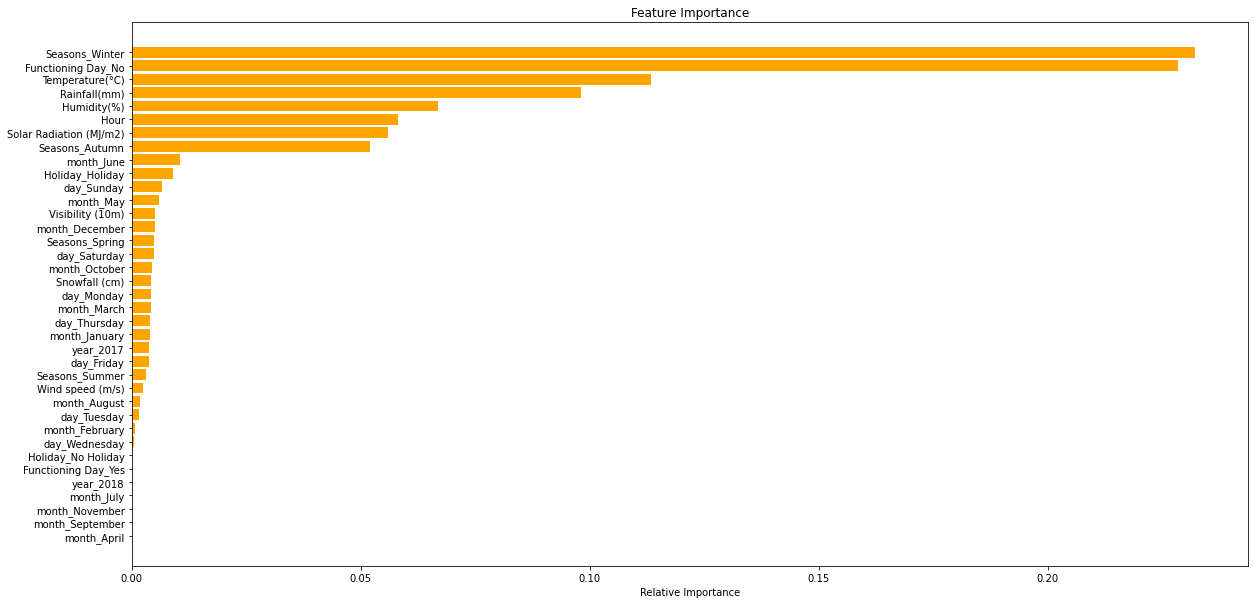

In [230]:
#barh plot of features and there importance
plt.figure(figsize=(20,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**XG Boost Using Grid Search CV**

In [231]:
#Grid Search CV
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
xgb_rr = GridSearchCV(xgb_r, param_grid = grid_values, cv=5)

# Fit the object to train dataset
xgb_rr.fit(X_train, y_train)

[13:19:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:19:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:19:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:19:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:19:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:19:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:19:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:19:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, estimator=XGBRegressor(seed=123),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]})

In [232]:
# Predicting the results
y_pred_train =xgb_rr.predict(X_train)
y_pred_test =xgb_rr.predict(X_test)

In [233]:
#Evaluation for train set
mean_squared_error_xgb_r_gridcv_train=mean_squared_error(y_train, y_pred_train)
r2_score_xgb_r_gridcv_train= r2_score(y_train, y_pred_train)
adjusted_r2_score_xgb_r_gridcv_train=1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("mean_squared_error_xgb_r_gridcv_train:",mean_squared_error_xgb_r_gridcv_train)
print("r2_score_xgb_r_gridcv_train:",r2_score_xgb_r_gridcv_train)
print("adjusted_r2_score_xgb_r_gridcv_train:",adjusted_r2_score_xgb_r_gridcv_train)

mean_squared_error_xgb_r_gridcv_train: 4.841590396947304
r2_score_xgb_r_gridcv_train: 0.9686289610830288
adjusted_r2_score_xgb_r_gridcv_train: 0.9684624290256503


In [234]:
#Evaluation for test set
mean_squared_error_xgb_r_gridcv_test=mean_squared_error(y_test, y_pred_test)
r2_score_xgb_r_gridcv_test= r2_score(y_test, y_pred_test)
adjusted_r2_score_xgb_r_gridcv_test=1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("mean_squared_error_xgb_r_gridcv_test:",mean_squared_error_xgb_r_gridcv_test)
print("r2_score_xgb_r_gridcv_test:",r2_score_xgb_r_gridcv_test)
print("adjusted_r2_score_xgb_r_gridcv_test:",adjusted_r2_score_xgb_r_gridcv_test)

mean_squared_error_xgb_r_gridcv_test: 11.61033008968581
r2_score_xgb_r_gridcv_test: 0.9262771857191026
adjusted_r2_score_xgb_r_gridcv_test: 0.9246857364026537


# **Comparing Efficiency Of Different Models**

In [235]:
#models and there results in dictionary
model_dict= {'Linear Regression':[mean_squared_error_linear_train,mean_squared_error_linear_test, r2_score_linear_train,r2_score_linear_test,adjusted_r2_score_linear_train,adjusted_r2_score_linear_test], 'Decision Tree':[mean_squared_error_decision_tree_train,mean_squared_error_decision_tree_test, r2_score_decision_tree_train,r2_score_decision_tree_test,adjusted_r2_score_decision_tree_train,adjusted_r2_score_decision_tree_test],'Decision Tree Using GridSearchCV':[mean_squared_error_decision_tree_gridcv_train,mean_squared_error_decision_tree_gridcv_test,r2_score_decision_tree_gridcv_train,r2_score_decision_tree_gridcv_test,adjusted_r2_score_decision_tree_gridcv_train,adjusted_r2_score_decision_tree_gridcv_test],'Random Forest':[mean_squared_error_RF_Regressor_train,mean_squared_error_RF_Regressor_test,r2_score_RF_Regressor_train,r2_score_RF_Regressor_test,adjusted_r2_score_RF_Regressor_train,adjusted_r2_score_RF_Regressor_test],'Random Forest Using GridSearchCV':[mean_squared_error_RF_Regressor_gridcv_train,mean_squared_error_RF_Regressor_gridcv_test,r2_score_RF_Regressor_gridcv_train,r2_score_RF_Regressor_gridcv_test,adjusted_r2_score_RF_Regressor_gridcv_train,adjusted_r2_score_RF_Regressor_gridcv_test],'Gradient Boosting':[mean_squared_error_gbr_train,mean_squared_error_gbr_test,r2_score_gbr_train,r2_score_gbr_test,adjusted_r2_score_gbr_train,adjusted_r2_score_gbr_test],'Gradient Boosting using GridSearchCV':[mean_squared_error_gbr_gridcv_train,mean_squared_error_gbr_gridcv_test,r2_score_gbr_gridcv_train,r2_score_gbr_gridcv_test,adjusted_r2_score_gbr_gridcv_train,adjusted_r2_score_gbr_gridcv_test],'XG Boost':[mean_squared_error_xgb_r_train,mean_squared_error_xgb_r_test,r2_score_xgb_r_train,r2_score_xgb_r_test,adjusted_r2_score_xgb_r_train,adjusted_r2_score_xgb_r_test],'XG Boost Using GridSearchCV':[mean_squared_error_xgb_r_gridcv_train,mean_squared_error_xgb_r_gridcv_test,r2_score_xgb_r_gridcv_train,r2_score_xgb_r_gridcv_test,adjusted_r2_score_xgb_r_gridcv_train,adjusted_r2_score_xgb_r_gridcv_test]} 

In [236]:
#converting dictionary into Dataframe
result=pd.DataFrame(model_dict,index =['Mean Squared Error Train','Mean Squared Error Test','r2 score Train','r2 score Test','Adjusted r2 score Train','Adjusted r2 score Test']) 

In [237]:
#highlighting adjusted r2 score row
highlight= lambda x: ['background:red' if x.name in ['Adjusted r2 score Test'] else '' for i in x]
result.style.apply(highlight, axis=1)

,Linear Regression,Decision Tree,Decision Tree Using GridSearchCV,Random Forest,Random Forest Using GridSearchCV,Gradient Boosting,Gradient Boosting using GridSearchCV,XG Boost,XG Boost Using GridSearchCV
Mean Squared Error Train,51.631967,0.000000,23.018425,1.700078,19.691288,16.739420,37.352121,16.651344,4.841590
Mean Squared Error Test,53.377437,26.043439,30.217535,12.820382,23.644006,19.364163,41.017538,18.978952,11.610330
r2 score Train,0.665451,1.000000,0.852302,0.988984,0.872410,0.891537,0.757977,0.892108,0.968629
r2 score Test,0.661066,0.830109,0.802880,0.918594,0.849866,0.877042,0.739548,0.879488,0.926277
Adjusted r2 score Train,0.663675,1.000000,0.851365,0.988926,0.871733,0.890961,0.756693,0.891535,0.968462
Adjusted r2 score Test,0.653750,0.827906,0.800323,0.916836,0.846625,0.874388,0.733926,0.876887,0.924686


# **Conclusions**





*   *XG Boost Using GridSearchCV Is The Best Fitted Model To Our Data*
*   *It Gives About 97% Accuracy In Training Data And 92% Accuracy In Test Data* 

